# Video: Grouping Data in Pandas

This video shows how to group data in pandas data frames, and implement basic bucketed analysis.

## Palmer Penguins

The Palmer Penguins data set has a few natural groupings that are nice to illustrate the grouping features of pandas.

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)
Artwork by @allison_horst

## Code Example: Grouping and Comparing Penguin Data

In [ ]:
import pandas as pd

Script:
* The Palmer penguins data set is provided as three separate data sets for different species that were studied.

In [ ]:
penguins_adelie = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff", index_col="Sample Number")
penguins_gentoo = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381", index_col="Sample Number")
penguins_chinstrap = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462", index_col="Sample Number")

Script:
* The separate data sets have the same columns, so we will just concatenate them into one data frame.

In [ ]:
penguins = pd.concat([penguins_adelie, penguins_gentoo, penguins_chinstrap])

Script:
* Pandas grouping functionality is based around the data frame method groupby.


In [ ]:
species_groups = penguins.groupby("Species")
species_groups

Script:
* Usually groupby is called with a column name or list of columns like this.
* There are a few other options such as passing in a dictionary or a function mapping index labels to groups.
* Let's see what we can learn from this grouping.

In [ ]:
len(species_groups)

3

Script:
* There are three distinct Species values.
* That checks out since we combined three files, and each was supposed to have a different species in it.
* We can take a peak into which rows went into each group.

In [ ]:
species_groups.groups

{'Adelie Penguin (Pygoscelis adeliae)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...], 'Chinstrap penguin (Pygoscelis antarctica)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68], 'Gentoo penguin (Pygoscelis papua)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56

Script:
* So lots of rows matched each species.
* The row labels are the sample numbers of the original files, but they were not unique across files.
* Using the groupby object, we can calculate statistics for each group.

In [ ]:
species_groups.mean(numeric_only=True)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,
Adelie Penguin (Pygoscelis adeliae),38.791391,18.346358,189.953642,3700.662252,8.859733,-25.804194
Chinstrap penguin (Pygoscelis antarctica),48.833824,18.420588,195.823529,3733.088235,9.356155,-24.546542
Gentoo penguin (Pygoscelis papua),47.504878,14.982114,217.186992,5076.016260,8.245338,-26.185298


Script:
* The numeric_only option that I used there was to filter out columns such as Sex and Comments that don't make sense when taking an average.
* I'd like to point out that the index on this data frame is now the Species values from the original data frame, since the grouping was on that column.
* The groupby object does have a plot method, but I did not find it particularly helpful with this data set.

Species
Adelie Penguin (Pygoscelis adeliae)          Axes(0.125,0.11;0.775x0.77)
Chinstrap penguin (Pygoscelis antarctica)    Axes(0.125,0.11;0.775x0.77)
Gentoo penguin (Pygoscelis papua)            Axes(0.125,0.11;0.775x0.77)
dtype: object

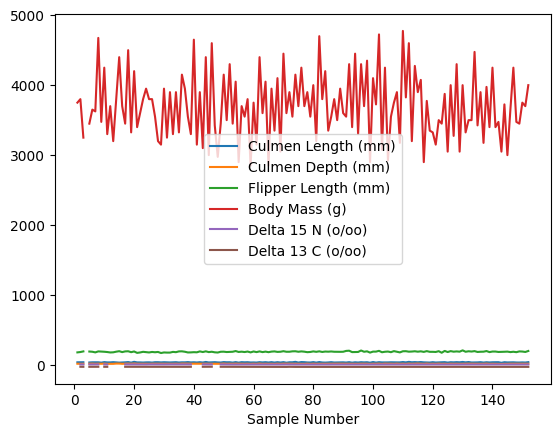

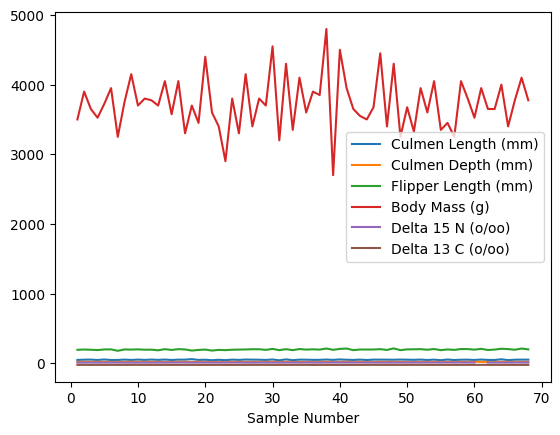

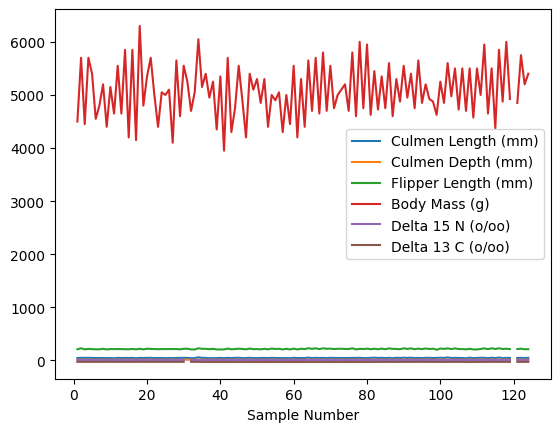

In [ ]:
species_groups.plot()

Script:
* There is an option to split that out into more plots, but that didn't improve things to my eye.
* We will dig into better visualizations next week.
* In the mean time, do you remember the describe method of data frames?
* You can use it on the groupby objects too.

In [ ]:
species_groups.describe()

Culmen Length (mm)             \
                                                       count       mean   
Species                                                                   
Adelie Penguin (Pygoscelis adeliae)                    151.0  38.791391   
Chinstrap penguin (Pygoscelis antarctica)               68.0  48.833824   
Gentoo penguin (Pygoscelis papua)                      123.0  47.504878   

                                                                         \
                                                std   min    25%    50%   
Species                                                                   
Adelie Penguin (Pygoscelis adeliae)        2.663405  32.1  36.75  38.80   
Chinstrap penguin (Pygoscelis antarctica)  3.339256  40.9  46.35  49.55   
Gentoo penguin (Pygoscelis papua)          3.081857  40.9  45.30  47.30   

                                                        Culmen Depth (mm)  \
                                              75%   max             count   
Species                                                                     
Adelie Penguin (Pygoscelis adeliae)        40.750  46.0             151.0   
Chinstrap penguin (Pygoscelis antarctica)  51.075  58.0              68.0   
Gentoo penguin (Pygoscelis papua)          49.550  59.6             123.0   

                                                      ... Delta 15 N (o/oo)  \
                                                mean  ...               75%   
Species                                               ...                     
Adelie Penguin (Pygoscelis adeliae)        18.346358  ...          9.153080   
Chinstrap penguin (Pygoscelis antarctica)  18.420588  ...          9.620455   
Gentoo penguin (Pygoscelis papua)          14.982114  ...          8.418402   

                                                    Delta 13 C (o/oo)  \
                                                max             count   
Species                                                                 
Adelie Penguin (Pygoscelis adeliae)         9.79532             141.0   
Chinstrap penguin (Pygoscelis antarctica)  10.02544              68.0   
Gentoo penguin (Pygoscelis papua)           8.83352             122.0   

                                                                          \
                                                mean       std       min   
Species                                                                    
Adelie Penguin (Pygoscelis adeliae)       -25.804194  0.588186 -26.78958   
Chinstrap penguin (Pygoscelis antarctica) -24.546542  0.238809 -25.14550   
Gentoo penguin (Pygoscelis papua)         -26.185298  0.538554 -27.01854   

                                                                            \
                                                 25%        50%        75%   
Species                                                                      
Adelie Penguin (Pygoscelis adeliae)       -26.230270 -25.976960 -25.298050   
Chinstrap penguin (Pygoscelis antarctica) -24.685153 -24.572375 -24.400333   
Gentoo penguin (Pygoscelis papua)         -26.690912 -26.221575 -25.640160   

                                                     
                                                max  
Species                                              
Adelie Penguin (Pygoscelis adeliae)       -23.90309  
Chinstrap penguin (Pygoscelis antarctica) -23.78767  
Gentoo penguin (Pygoscelis papua)         -25.00169  

[3 rows x 48 columns]

Script:
* Maybe that was too much.
* Let's repeat it for just one column.

In [ ]:
species_groups["Body Mass (g)"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Adelie Penguin (Pygoscelis adeliae),151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap penguin (Pygoscelis antarctica),68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo penguin (Pygoscelis papua),123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


Script:
* I find these stats much easier to comprehend looking at one column at a time.
* Reading the data here, I see that Adelie and Chinstrap penguins are similar in size judging by their mean body mass.
* Adelie penguins appear to have a wider distribution, but the smallest Chinstrap penguin was noticably smaller than the smallest Adelie.
* Meanwhile, the Gentoo penguins were much bigger, and the smallest measured Gentoo penguin was bigger than the averages of both Adelie and Chinstrap penguins.
* That difference should be visible when we plot their data later.
* Let's look at some more breakdowns using more columns.

In [ ]:
penguins.groupby(["Species", "Sex"]).mean(numeric_only=True)

Culmen Length (mm)  \
Species                                   Sex                          
Adelie Penguin (Pygoscelis adeliae)       FEMALE           37.257534   
                                          MALE             40.390411   
Chinstrap penguin (Pygoscelis antarctica) FEMALE           46.573529   
                                          MALE             51.094118   
Gentoo penguin (Pygoscelis papua)         .                44.500000   
                                          FEMALE           45.563793   
                                          MALE             49.473770   

                                                  Culmen Depth (mm)  \
Species                                   Sex                         
Adelie Penguin (Pygoscelis adeliae)       FEMALE          17.621918   
                                          MALE            19.072603   
Chinstrap penguin (Pygoscelis antarctica) FEMALE          17.588235   
                                          MALE            19.252941   
Gentoo penguin (Pygoscelis papua)         .               15.700000   
                                          FEMALE          14.237931   
                                          MALE            15.718033   

                                                  Flipper Length (mm)  \
Species                                   Sex                           
Adelie Penguin (Pygoscelis adeliae)       FEMALE           187.794521   
                                          MALE             192.410959   
Chinstrap penguin (Pygoscelis antarctica) FEMALE           191.735294   
                                          MALE             199.911765   
Gentoo penguin (Pygoscelis papua)         .                217.000000   
                                          FEMALE           212.706897   
                                          MALE             221.540984   

                                                  Body Mass (g)  \
Species                                   Sex                     
Adelie Penguin (Pygoscelis adeliae)       FEMALE    3368.835616   
                                          MALE      4043.493151   
Chinstrap penguin (Pygoscelis antarctica) FEMALE    3527.205882   
                                          MALE      3938.970588   
Gentoo penguin (Pygoscelis papua)         .         4875.000000   
                                          FEMALE    4679.741379   
                                          MALE      5484.836066   

                                                  Delta 15 N (o/oo)  \
Species                                   Sex                         
Adelie Penguin (Pygoscelis adeliae)       FEMALE           8.793275   
                                          MALE             8.928437   
Chinstrap penguin (Pygoscelis antarctica) FEMALE           9.250962   
                                          MALE             9.464535   
Gentoo penguin (Pygoscelis papua)         .                8.041110   
                                          FEMALE           8.193405   
                                          MALE             8.303429   

                                                  Delta 13 C (o/oo)  
Species                                   Sex                        
Adelie Penguin (Pygoscelis adeliae)       FEMALE         -25.794158  
                                          MALE           -25.833813  
Chinstrap penguin (Pygoscelis antarctica) FEMALE         -24.565405  
                                          MALE           -24.527679  
Gentoo penguin (Pygoscelis papua)         .              -26.184440  
                                          FEMALE         -26.197205  
                                          MALE           -26.170608

Script:
* It looks like male penguins tend to be bigger than female penguins, after adjusting for species.
* But what is that third row for Gentoo penguins?

In [ ]:
penguins["Sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

Script:
* According to the paper, this column was populated based on genetic testing.
* nan stands for Not a Number, so this sounds like missing data.
* Let's look at the individual rows.

In [ ]:
penguins.query("Sex not in ('MALE', 'FEMALE')")

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
Sample Number,,,,,,,,,,,,,,,,
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
9,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,2007-11-09,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
10,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,2007-11-09,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.
11,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N6A1,Yes,2007-11-09,37.8,17.1,186.0,3300.0,NaN,8.63243,-25.21315,No blood sample obtained for sexing.
12,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N6A2,Yes,2007-11-09,37.8,17.3,180.0,3700.0,NaN,NaN,NaN,No blood sample obtained.
48,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N29A2,Yes,2007-11-13,37.5,18.9,179.0,2975.0,NaN,NaN,NaN,Sexing primers did not amplify. Not enough blo...
27,PAL0708,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,2007-11-29,44.5,14.3,216.0,4100.0,NaN,7.96621,-25.69327,Sexing primers did not amplify.
67,PAL0809,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N51A1,Yes,2008-11-09,46.2,14.4,214.0,4650.0,NaN,8.24253,-26.81540,Sexing primers did not amplify.
105,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N24A1,Yes,2009-12-01,47.3,13.8,216.0,4725.0,NaN,8.25818,-26.23886,Sexing primers did not amplify.


Script:
* According to the comments with those rows, it appears they were unable to get blood samples, or they had trouble with the genetic test.
* We can summarize those comments with another groupby.

In [ ]:
penguins.query("Sex not in ('MALE', 'FEMALE')").groupby("Comments").size()

Comments
Adult not sampled.                                                1
Adult not sampled. Nest never observed with full clutch.          1
No blood sample obtained for sexing.                              2
No blood sample obtained.                                         2
Sexing primers did not amplify.                                   4
Sexing primers did not amplify. Not enough blood for isotopes.    1
dtype: int64

Script:
* Eyeballing those numbers, six were from lack of a blood sample, and five were from the genetic test failing.
* Overall, this is a small percentage of the data, but we should expect these to be popping up when we perform exploratory analysis on this data set next week.

## Group By for Exploration

* Grouping data makes it easier to see bigger trends and variation.
  * Works best with few groups.
* Pandas groupby ignores rows with missing values by default, so there is a potential blind spot.
  * Disable that behavor with `dropna=False`.
* Grouping on only one column will hide interactions between variables.


Script:
* A couple things to note from this example.
* First, grouping data like this can make it easier to see some higher level properties of the data, particularly if the number of distinct values is low and you can see them all at once.
* Second, the groupby did not show the not a number values when we first looked at it. We actually saw those after noticing the period in that column, and looking deeper.
Ignoring those values in the groupby can be turned off, but you still won't notice unless you look.
* One more general note.
* Grouping on only one column will not give you a complete picture in most cases.
* It is rare for one variable to explain everything.
* Next week, we will focus more on exploratory analysis, expanding on the grouping techniques now, and finding more complex relationships in the data.